In [3]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

TASK: Create an image, e.g. 800x800 pixels, with the texture of a chessboard

(np.float64(-0.5), np.float64(799.5), np.float64(799.5), np.float64(-0.5))

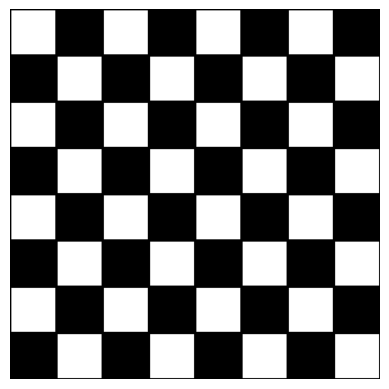

In [113]:
height = width = 800

# Create a black image with a single channel (grayscale)
img = np.zeros(shape=(height, width, 1), dtype=np.uint8)

num_divisions = int(heigth / 10)

#Color the square

for i in range(0, num_divisions):

    for j in range(0, num_divisions):
        if i % 2 == 0:
            img[i*100:i*100+100, j*200:j*200+100] = 255
        else:
            img[i*100:i*100+100, j*200 +100:j*200+200] = 255
            
#add the lines
for i in range(num_divisions + 1):
    cv2.line(img, (int(i*100), 0) , (int(i*100), height), (0,0,255), 4)
    cv2.line(img, (0,int(i*100)) , (height,int(i*100)), (0,0,255), 4)


    


plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.axis('off')  